In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
data= pd.read_csv('../DATA/Sacramento_transactions.csv')

In [11]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [12]:
data.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [16]:
data['sale_date']= pd.to_datetime(data['sale_date'])

In [23]:
data.sample(10)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
370,5380 VILLAGE WOOD DR,SACRAMENTO,95823,CA,2,2,901,Residential,2008-05-19,121500,38.454949,-121.440578
831,1124 PERKINS WAY,SACRAMENTO,95818,CA,2,1,1304,Residential,2008-05-16,413500,38.551611,-121.504437
704,140 VENTO CT,ROSEVILLE,95678,CA,3,2,0,Condo,2008-05-16,212500,38.793533,-121.289685
549,4734 GIBBONS DR,CARMICHAEL,95608,CA,4,3,3357,Residential,2008-05-19,668365,38.635580,-121.353639
762,2987 DIORITE WAY,SACRAMENTO,95835,CA,5,3,2280,Residential,2008-05-16,279000,38.667332,-121.528276
262,632 NEWBRIDGE LN,LINCOLN,95648,CA,4,2,0,Residential,2008-05-20,261800,38.879084,-121.298586
925,7342 DAVE ST,SACRAMENTO,95828,CA,3,1,1638,Residential,2008-05-15,170725,38.490822,-121.401643
118,8664 MAGNOLIA HILL WAY,ELK GROVE,95624,CA,4,2,2309,Residential,2008-05-21,311000,38.442352,-121.389675
215,7129 SPRINGMONT DR,ELK GROVE,95758,CA,3,2,1716,Residential,2008-05-20,180400,38.417649,-121.420294
833,1484 RADCLIFFE WAY,AUBURN,95603,CA,4,3,2278,Residential,2008-05-16,420454,38.935579,-121.079018


In [26]:
#since zip code is unique we change it into string because the mean ,median of zip doesnt make any sense

In [27]:
data['zip']= data['zip'].astype('str')

In [29]:
data.zip.dtypes

dtype('O')

In [30]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [32]:
#looking at the dataset we have minimum value for beds, baths and sq_ft

In [35]:
data[data['beds']==0].value_counts()

street                  city             zip    state  beds  baths  sq__ft  type         sale_date   price   latitude   longitude  
7 CRYSTALWOOD CIR       LINCOLN          95648  CA     0     0      0       Residential  2008-05-19  4897    38.885962  -121.289436    2
100 CRYSTALWOOD CIR     LINCOLN          95648  CA     0     0      0       Residential  2008-05-19  4897    38.886091  -121.289744    1
44 CRYSTALWOOD CIR      LINCOLN          95648  CA     0     0      0       Residential  2008-05-19  4897    38.884590  -121.289835    1
5404 ALMOND FALLS WAY   RANCHO CORDOVA   95742  CA     0     0      0       Residential  2008-05-20  425000  38.527502  -121.233492    1
5337 DUSTY ROSE WAY     RANCHO CORDOVA   95742  CA     0     0      0       Residential  2008-05-21  320000  38.528575  -121.228600    1
                                                                                                                                      ..
2148 RANCH VIEW DR      ROCKLIN          95765

In [36]:
data[data['baths']==0].value_counts()

street                  city             zip    state  beds  baths  sq__ft  type         sale_date   price   latitude   longitude  
7 CRYSTALWOOD CIR       LINCOLN          95648  CA     0     0      0       Residential  2008-05-19  4897    38.885962  -121.289436    2
100 CRYSTALWOOD CIR     LINCOLN          95648  CA     0     0      0       Residential  2008-05-19  4897    38.886091  -121.289744    1
44 CRYSTALWOOD CIR      LINCOLN          95648  CA     0     0      0       Residential  2008-05-19  4897    38.884590  -121.289835    1
5404 ALMOND FALLS WAY   RANCHO CORDOVA   95742  CA     0     0      0       Residential  2008-05-20  425000  38.527502  -121.233492    1
5337 DUSTY ROSE WAY     RANCHO CORDOVA   95742  CA     0     0      0       Residential  2008-05-21  320000  38.528575  -121.228600    1
                                                                                                                                      ..
2148 RANCH VIEW DR      ROCKLIN          95765

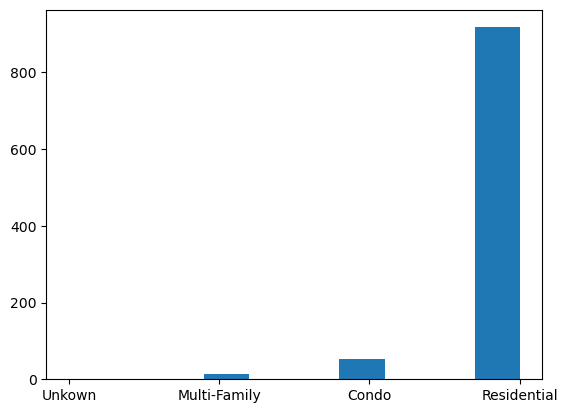

In [55]:
plt.hist(data.type)
plt.gca().invert_xaxis()

In [49]:
import seaborn as sns

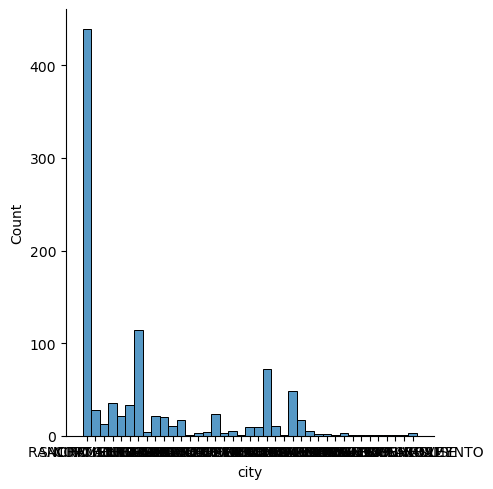

In [53]:
sns.displot(data.city, )

<Figure size 4000x2000 with 0 Axes>

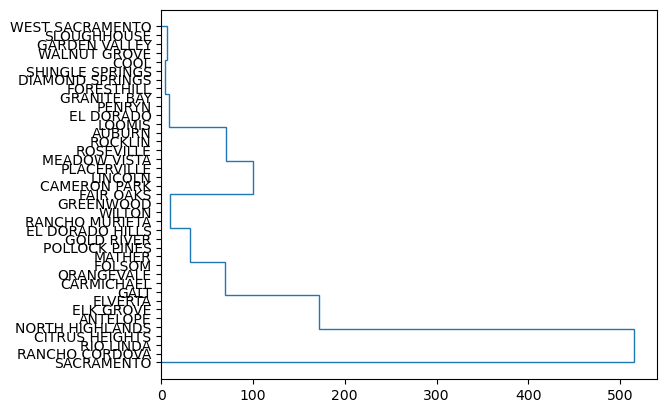

<Figure size 4000x2000 with 0 Axes>

In [119]:
plt.hist(data.city, orientation='horizontal',bins=10, histtype='step')
plt.figure(figsize=(40,20))

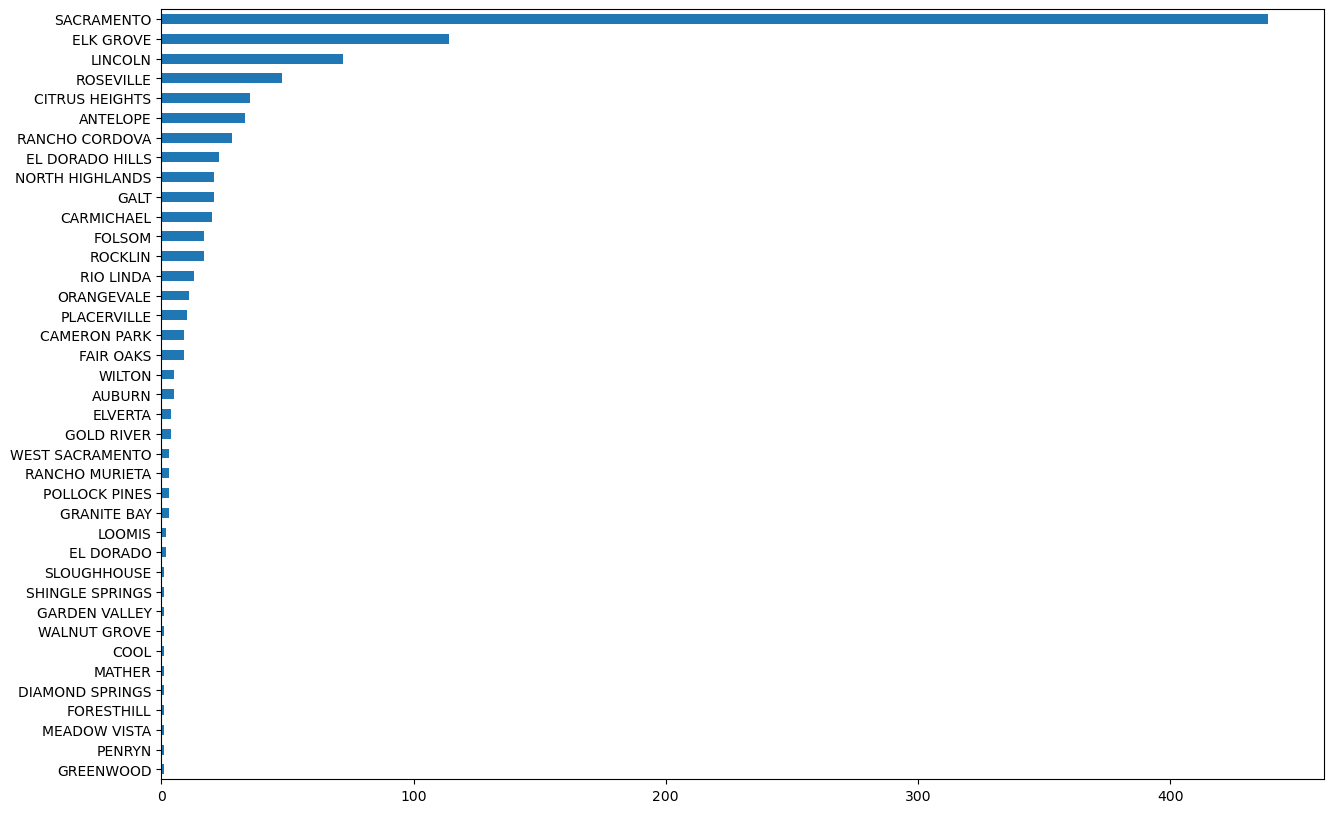

In [110]:
data['city'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));

In [122]:
data.loc[data['beds']==0,'type']='Land'

In [125]:
data[data['beds']==0].value_counts()

street                  city             zip    state  beds  baths  sq__ft  type  sale_date   price   latitude   longitude  
7 CRYSTALWOOD CIR       LINCOLN          95648  CA     0     0      0       Land  2008-05-19  4897    38.885962  -121.289436    2
100 CRYSTALWOOD CIR     LINCOLN          95648  CA     0     0      0       Land  2008-05-19  4897    38.886091  -121.289744    1
44 CRYSTALWOOD CIR      LINCOLN          95648  CA     0     0      0       Land  2008-05-19  4897    38.884590  -121.289835    1
5404 ALMOND FALLS WAY   RANCHO CORDOVA   95742  CA     0     0      0       Land  2008-05-20  425000  38.527502  -121.233492    1
5337 DUSTY ROSE WAY     RANCHO CORDOVA   95742  CA     0     0      0       Land  2008-05-21  320000  38.528575  -121.228600    1
                                                                                                                               ..
2148 RANCH VIEW DR      ROCKLIN          95765  CA     0     0      0       Land  2008-05-19  4

(array([818.,   0.,   0.,  46.,   0.,   0.,  13.,   0.,   0., 108.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

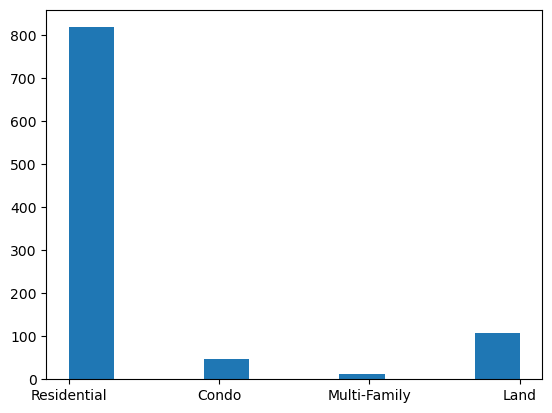

In [126]:
plt.hist(data.type)

In [134]:
X=data['sq__ft'].values.reshape(-1,1)
Y= data['price']

In [129]:
from sklearn.linear_model import LinearRegression

In [136]:
model=LinearRegression()
model.fit(X,Y)
print(model.coef_, model.intercept_)

[54.15863969] 162930.16140699777


In [138]:
model.score(X,Y)

0.11148717682951437

In [142]:
from sklearn.model_selection import train_test_split

In [145]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.35)

In [146]:
model.fit(X_train,Y_train)

LinearRegression()

In [147]:
print(model.coef_, model.intercept_)

[49.97506985] 171403.55817830097


In [148]:
model.score(X_test,Y_test)

0.13309225601435004

In [149]:
X=data[['sq__ft','baths','beds']]

In [153]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [154]:
model.fit(X_train,Y_train)
print(model.coef_,model.intercept_)

[ 1.65265914e+01  6.55237602e+04 -8.10108512e+03] 117936.5752754257


In [155]:
model.score(X_test,Y_test)

0.1675679415727238

In [157]:
X=[[1203,2,3]]

In [158]:
Ypred= model.predict(X)
print(Ypred[0])

244562.3298474797


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
